In [33]:
import os
import matplotlib.pyplot as plt

exp_results = {}

files = os.listdir()
files

['plotting.ipynb',
 'perm_mnist_10_tasks_100_epochs_0.01_lr_sgd_optim_4_beta_11:13_05-07-2024.txt',
 'perm_mnist_10_tasks_100_epochs_1.0_mean_eta_bgd_optim_4_beta_11:13_05-07-2024.txt']

In [34]:
from ast import literal_eval


def extract_roundwise_task_accuracies_file_based(file_name):

    with open(file_name) as f:
        file_data = f.readlines()

    pattern = 'Task-wise accuracies after all rounds are '
    accuracies = None

    for line in file_data:
        if pattern in line:
            acc_string = line.split(pattern)[1]
            accuracies = literal_eval(acc_string)

    accuracies = [[round(item, 2) for item in sublist] for sublist in accuracies]

    # print(accuracies)

    return accuracies

In [35]:
for file in files:
    if file.startswith("perm_mnist"):
        print(f' file name : {file}')
        learning_rate = float(file.split('_')[6])
        # print(learning_rate)
        if 'bgd' in file.split('_'):
            optimizer = 'bgd'
        else:
            optimizer = 'sgd'
    
        accuracy_lists = extract_roundwise_task_accuracies_file_based(file)
        print(accuracy_lists)

        # task_wise_accuracies_over_rounds = [[accuracy_lists[round_no][task] for round_no in range(task, len(accuracy_lists))] for task in range(0,len(accuracy_lists))]

        # for round_no in range(len(accuracy_lists)):
            # task_accuracies = accuracy_lists[][]
        
        if learning_rate not in exp_results:
            exp_results[learning_rate] = {}

        if optimizer not in exp_results[learning_rate].keys():
            exp_results[learning_rate][optimizer] = {}
            
        exp_results[learning_rate][optimizer]['round_wise_task_accuracies'] = accuracy_lists
        # exp_results[learning_rate][optimizer]['task_wise_accuracies_over_rounds'] = task_wise_accuracies_over_rounds

 file name : perm_mnist_10_tasks_100_epochs_0.01_lr_sgd_optim_4_beta_11:13_05-07-2024.txt
[[95.11], [96.44], [96.96], [97.19], [97.14, 96.54], [97.11, 97.04], [96.96, 97.34], [95.76, 97.54], [94.38, 97.55], [93.36, 97.57, 97.06], [92.21, 97.46, 97.45], [89.77, 97.19, 97.61], [86.96, 96.66, 97.69], [82.9, 96.07, 97.76], [79.12, 95.1, 97.71, 97.25], [77.33, 94.2, 97.67, 97.62], [74.13, 92.9, 97.34, 97.74], [67.73, 91.38, 96.7, 97.81], [58.07, 86.9, 94.79, 97.9], [51.96, 81.67, 90.79, 97.9, 97.22], [47.03, 76.14, 86.89, 97.75, 97.56], [44.64, 71.14, 83.86, 97.49, 97.65], [45.96, 66.21, 82.71, 96.92, 97.65], [42.37, 60.68, 74.66, 94.55, 97.8], [38.05, 58.22, 70.24, 92.43, 97.72, 97.36], [32.82, 57.17, 64.16, 89.54, 97.33, 97.71], [29.35, 53.41, 60.42, 86.86, 96.94, 97.92], [34.14, 50.44, 56.41, 80.92, 96.72, 97.92], [27.2, 42.91, 47.98, 70.81, 95.06, 97.98], [22.63, 38.47, 42.59, 63.13, 92.79, 97.87, 97.32], [20.19, 35.96, 37.85, 56.24, 89.32, 97.64, 97.6], [18.34, 33.04, 36.3, 52.15, 86.5

In [36]:
exp_results

{0.01: {'sgd': {'round_wise_task_accuracies': [[95.11],
    [96.44],
    [96.96],
    [97.19],
    [97.14, 96.54],
    [97.11, 97.04],
    [96.96, 97.34],
    [95.76, 97.54],
    [94.38, 97.55],
    [93.36, 97.57, 97.06],
    [92.21, 97.46, 97.45],
    [89.77, 97.19, 97.61],
    [86.96, 96.66, 97.69],
    [82.9, 96.07, 97.76],
    [79.12, 95.1, 97.71, 97.25],
    [77.33, 94.2, 97.67, 97.62],
    [74.13, 92.9, 97.34, 97.74],
    [67.73, 91.38, 96.7, 97.81],
    [58.07, 86.9, 94.79, 97.9],
    [51.96, 81.67, 90.79, 97.9, 97.22],
    [47.03, 76.14, 86.89, 97.75, 97.56],
    [44.64, 71.14, 83.86, 97.49, 97.65],
    [45.96, 66.21, 82.71, 96.92, 97.65],
    [42.37, 60.68, 74.66, 94.55, 97.8],
    [38.05, 58.22, 70.24, 92.43, 97.72, 97.36],
    [32.82, 57.17, 64.16, 89.54, 97.33, 97.71],
    [29.35, 53.41, 60.42, 86.86, 96.94, 97.92],
    [34.14, 50.44, 56.41, 80.92, 96.72, 97.92],
    [27.2, 42.91, 47.98, 70.81, 95.06, 97.98],
    [22.63, 38.47, 42.59, 63.13, 92.79, 97.87, 97.32],
    [20.19

In [43]:
exp_results

{0.01: {'sgd': {'round_wise_task_accuracies': [[95.11],
    [96.44],
    [96.96],
    [97.19],
    [97.14, 96.54],
    [97.11, 97.04],
    [96.96, 97.34],
    [95.76, 97.54],
    [94.38, 97.55],
    [93.36, 97.57, 97.06],
    [92.21, 97.46, 97.45],
    [89.77, 97.19, 97.61],
    [86.96, 96.66, 97.69],
    [82.9, 96.07, 97.76],
    [79.12, 95.1, 97.71, 97.25],
    [77.33, 94.2, 97.67, 97.62],
    [74.13, 92.9, 97.34, 97.74],
    [67.73, 91.38, 96.7, 97.81],
    [58.07, 86.9, 94.79, 97.9],
    [51.96, 81.67, 90.79, 97.9, 97.22],
    [47.03, 76.14, 86.89, 97.75, 97.56],
    [44.64, 71.14, 83.86, 97.49, 97.65],
    [45.96, 66.21, 82.71, 96.92, 97.65],
    [42.37, 60.68, 74.66, 94.55, 97.8],
    [38.05, 58.22, 70.24, 92.43, 97.72, 97.36],
    [32.82, 57.17, 64.16, 89.54, 97.33, 97.71],
    [29.35, 53.41, 60.42, 86.86, 96.94, 97.92],
    [34.14, 50.44, 56.41, 80.92, 96.72, 97.92],
    [27.2, 42.91, 47.98, 70.81, 95.06, 97.98],
    [22.63, 38.47, 42.59, 63.13, 92.79, 97.87, 97.32],
    [20.19

In [38]:
import numpy as np

def plot_average_accuracies_over_rounds(sgd_accuracies, bgd_accuracies):
    plt.figure(figsize=(10, 6))
    tasks = range(0, len(sgd_accuracies))
    
    sgd_means = [np.mean(np.array(task_accs)) for task_accs in sgd_accuracies]
    print(f'sgd means {sgd_means}')
    plt.plot(tasks, sgd_means, marker='o', label='SGD')
    
    bgd_means = [np.mean(np.array(task_accs)) for task_accs in bgd_accuracies]
    print(f'bgd means {bgd_means}')
    plt.plot(tasks, bgd_means, marker='s', label='BGD')

    # print(f' bgd means {bgd_means}')
    
    plt.xlabel('Round')
    plt.ylabel('Accuracy')
    plt.title(f'Average Accuracies per round for SGD and BGD')
    # plt.xticks(range(max(len(sgd_accuracies), len(bgd_accuracies))), [f'Round {i+1}' for i in range(max(len(sgd_accuracies), len(bgd_accuracies)))])
    plt.legend()
    plt.grid(True)
    plt.tight_layout()
    plt.show()

In [39]:
exp_results.keys()

dict_keys([0.01, 1.0])

In [40]:
exp_results[0.01].keys()

dict_keys(['sgd'])

In [41]:
exp_results[0.01]['sgd'].keys()

dict_keys(['round_wise_task_accuracies'])

sgd means [95.11, 96.44, 96.96, 97.19, 96.84, 97.075, 97.15, 96.65, 95.965, 95.99666666666667, 95.70666666666666, 94.85666666666667, 93.77, 92.24333333333334, 92.295, 91.705, 90.5275, 88.405, 84.41499999999999, 83.90800000000002, 81.074, 78.95599999999999, 77.89000000000001, 74.012, 75.67, 73.12166666666666, 70.81666666666668, 69.425, 63.65666666666667, 64.97142857142858, 62.11428571428571, 60.23714285714285, 62.13142857142858, 57.02428571428572, 59.25, 56.339999999999996, 54.23625, 54.411249999999995, 50.33625, 53.735555555555564, 52.05555555555556, 50.40888888888888, 50.82, 47.550000000000004, 50.329, 48.956999999999994, 47.454, 46.351, 45.201, 43.929]
bgd means [95.43, 96.69, 96.75, 97.14, 96.44, 95.85499999999999, 94.72, 93.1, 89.95500000000001, 86.36666666666667, 84.92, 80.32666666666667, 79.25, 75.65666666666668, 78.065, 76.85, 74.97, 72.1875, 66.86, 67.446, 65.96600000000001, 63.544000000000004, 61.513999999999996, 58.85999999999999, 62.30500000000001, 61.27, 58.961666666666666,

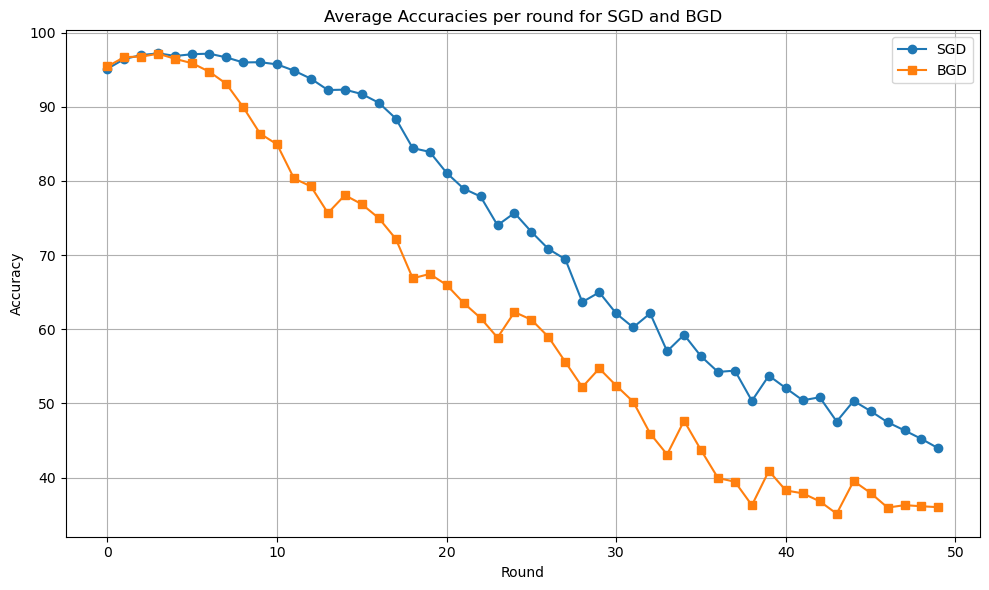

In [42]:
plot_average_accuracies_over_rounds(exp_results[0.01]['sgd']['round_wise_task_accuracies'], exp_results[1.0]['bgd']['round_wise_task_accuracies'] )

In [66]:
bgd_acc_at_round_50 = [12.43, 18.06, 8.86, 14.85, 18.77, 23.95, 33.32, 51.16, 82.94, 95.62]
sgd_acc_at_round_50 = [9.4, 11.49, 12.92, 18.85, 14.21, 40.27, 55.6, 82.12, 96.5, 97.93]

In [68]:
sum(sgd_acc_at_round_50), sum(bgd_acc_at_round_50)

(439.29, 359.96000000000004)

In [71]:
import matplotlib.pyplot as plt
import numpy as np

def pad_accuracies(accuracies):
    max_len = max(len(task) for task in accuracies)
    padded_accuracies = [task + [None] * (max_len - len(task)) for task in accuracies]
    return np.array(padded_accuracies, dtype=np.float32)

def plot_task_accuracies_roundwise(sgd_accuracies, bgd_accuracies):
 
    sgd_accuracies = pad_accuracies(sgd_accuracies)
    bgd_accuracies = pad_accuracies(bgd_accuracies)
    
    plt.figure(figsize=(10, 6))

    for i in range(sgd_accuracies.shape[1]):
        print(f'sgd_accuracies : {sgd_accuracies[:, i]}')
        task_accuracies_over_rounds = sgd_accuracies[:, i]
        print(task_accuracies_over_rounds)
        plt.plot(range(1, sgd_accuracies.shape[0] + 1), task_accuracies_over_rounds, marker='o', linestyle='--', label=f'SGD Task {i+1}')

    for i in range(bgd_accuracies.shape[1]):
        #print(f'bgd_accuracies : {bgd_accuracies[:, i]}')
        plt.plot(range(1, bgd_accuracies.shape[0] + 1), bgd_accuracies[:, i], marker='s', label=f'BGD Task {i+1}')
    
    plt.title(f'Task Accuracies Round-wise for SGD and BGD')
    plt.xlabel('Rounds')
    plt.ylabel('Accuracy')
    plt.legend()
    plt.grid(False)
    plt.tight_layout()
    plt.show()

sgd_accuracies : [95.11 96.44 96.96 97.19 97.14 97.11 96.96 95.76 94.38 93.36 92.21 89.77
 86.96 82.9  79.12 77.33 74.13 67.73 58.07 51.96 47.03 44.64 45.96 42.37
 38.05 32.82 29.35 34.14 27.2  22.63 20.19 18.34 23.48 17.94 16.01 14.34
 13.63 13.85 12.06 11.8  11.38 11.09 12.67 11.45 11.42 10.93 10.28  9.83
  9.61  9.4 ]
[95.11 96.44 96.96 97.19 97.14 97.11 96.96 95.76 94.38 93.36 92.21 89.77
 86.96 82.9  79.12 77.33 74.13 67.73 58.07 51.96 47.03 44.64 45.96 42.37
 38.05 32.82 29.35 34.14 27.2  22.63 20.19 18.34 23.48 17.94 16.01 14.34
 13.63 13.85 12.06 11.8  11.38 11.09 12.67 11.45 11.42 10.93 10.28  9.83
  9.61  9.4 ]
sgd_accuracies : [  nan   nan   nan   nan 96.54 97.04 97.34 97.54 97.55 97.57 97.46 97.19
 96.66 96.07 95.1  94.2  92.9  91.38 86.9  81.67 76.14 71.14 66.21 60.68
 58.22 57.17 53.41 50.44 42.91 38.47 35.96 33.04 33.65 25.49 21.61 17.61
 15.15 14.67 11.86 10.85 10.55 10.35 12.01 11.07 11.29 11.43 11.38 11.45
 11.54 11.49]
[  nan   nan   nan   nan 96.54 97.04 97.34 97.54

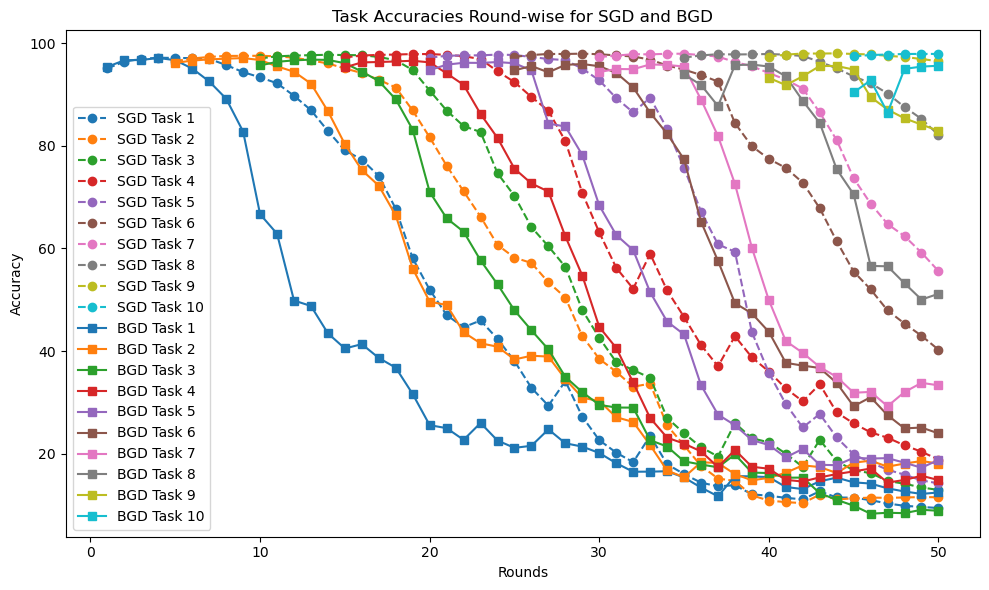

In [72]:
plot_task_accuracies_roundwise(exp_results[0.01]['sgd']['round_wise_task_accuracies'], exp_results[1.0]['bgd']['round_wise_task_accuracies'] )

+ BGD with beta = 3 (less overlapping)

In [10]:
import numpy as np
import matplotlib.pyplot as plt

def plot_average_accuracies_over_rounds( bgd_accuracies):
    plt.figure(figsize=(10, 6))
    tasks = range(0, len(bgd_accuracies))
    
    # sgd_means = [np.mean(np.array(task_accs)) for task_accs in sgd_accuracies]
    # plt.plot(tasks, sgd_means, marker='o', label='SGD')
    
    bgd_means = [np.mean(np.array(task_accs)) for task_accs in bgd_accuracies]
    print(f' bgd_men acc : {bgd_means}')
    plt.plot(tasks, bgd_means, marker='s', label='BGD')
    
    plt.xlabel('Round')
    plt.ylabel('Accuracy')
    plt.title(f'Average Accuracies per round for SGD and BGD')
    # plt.xticks(range(max(len(sgd_accuracies), len(bgd_accuracies))), [f'Round {i+1}' for i in range(max(len(sgd_accuracies), len(bgd_accuracies)))])
    plt.legend()
    plt.grid(True)
    plt.tight_layout()
    plt.show()

In [11]:
beta_3_bgd_accs = [[95.39], [96.72], [96.95], [97.02], [96.93, 96.62], [95.64, 96.9], [94.08, 96.84], [86.09, 97.16], [80.29, 97.02], [74.72, 96.52, 96.1], [69.35, 95.13, 96.59], [62.78, 92.61, 96.64], [55.98, 91.24, 96.86], [47.09, 87.24, 96.67], [43.4, 83.51, 96.33, 95.91], [40.59, 75.41, 95.13, 96.43], [38.87, 70.39, 91.88, 96.69], [33.17, 57.36, 89.47, 96.69], [33.3, 48.43, 85.22, 96.61], [34.8, 48.52, 80.61, 96.3, 95.4], [33.35, 45.39, 72.34, 94.54, 94.86], [34.48, 40.44, 65.55, 89.78, 95.19], [31.92, 35.42, 53.53, 86.19, 96.51], [30.98, 35.57, 50.35, 80.71, 96.53], [28.86, 34.38, 44.93, 76.55, 96.16, 95.13], [25.35, 34.05, 45.8, 71.08, 94.1, 95.68], [23.89, 31.55, 43.12, 64.41, 92.74, 96.08], [20.72, 29.13, 32.23, 57.84, 88.6, 96.28], [20.64, 29.4, 31.21, 48.6, 84.44, 96.0], [20.01, 23.85, 28.79, 40.51, 77.78, 96.18, 95.06], [19.14, 23.44, 29.82, 35.34, 71.73, 94.33, 94.75], [17.52, 20.42, 28.1, 33.77, 63.39, 90.89, 95.94], [16.59, 19.84, 25.97, 30.82, 47.65, 82.01, 95.7], [14.7, 19.27, 23.3, 23.82, 45.55, 74.08, 95.44], [12.42, 16.62, 19.19, 23.24, 41.59, 70.36, 95.6, 94.39], [10.66, 15.63, 18.61, 23.57, 36.97, 62.48, 93.55, 95.15], [12.42, 13.62, 20.57, 21.58, 35.77, 62.73, 91.33, 95.39], [13.01, 14.62, 22.05, 16.66, 29.12, 49.8, 86.51, 95.72], [14.17, 14.37, 20.38, 16.41, 24.72, 44.25, 81.05, 95.45], [13.86, 14.63, 18.49, 16.15, 23.15, 41.98, 78.88, 95.47, 93.94], [16.58, 12.84, 17.95, 18.41, 24.05, 39.97, 73.38, 92.31, 94.34], [15.37, 13.64, 18.14, 18.7, 20.23, 33.3, 65.94, 88.23, 95.16], [16.57, 13.0, 15.52, 16.87, 17.4, 30.25, 56.42, 80.32, 95.28], [14.25, 13.45, 15.24, 17.22, 17.36, 30.01, 52.39, 76.13, 95.19], [13.95, 11.91, 18.21, 15.36, 16.8, 31.04, 48.69, 68.49, 93.66, 86.59], [11.91, 11.01, 17.66, 16.76, 17.59, 31.95, 37.67, 61.74, 84.43, 83.56], [14.51, 13.17, 17.94, 18.11, 18.02, 28.03, 42.53, 61.48, 84.27, 94.65], [13.13, 12.68, 16.97, 18.13, 16.88, 26.81, 39.41, 58.67, 84.44, 95.19], [12.09, 12.59, 15.16, 18.36, 15.22, 26.66, 36.68, 54.37, 82.16, 95.53], [13.55, 11.49, 15.74, 17.47, 14.32, 28.11, 36.38, 52.17, 77.5, 95.65]]


 bgd_men acc : [95.39, 96.72, 96.95, 97.02, 96.775, 96.27000000000001, 95.46000000000001, 91.625, 88.655, 89.11333333333334, 87.02333333333333, 84.00999999999999, 81.36, 77.0, 79.7875, 76.89, 74.4575, 69.1725, 65.89, 71.126, 68.096, 65.088, 60.714, 58.827999999999996, 62.66833333333333, 61.01, 58.63166666666666, 54.133333333333326, 51.714999999999996, 54.597142857142856, 52.65, 50.00428571428571, 45.51142857142857, 42.308571428571426, 46.676249999999996, 44.5775, 44.17625, 40.93625, 38.85, 44.06111111111111, 43.31444444444445, 40.96777777777778, 37.958888888888886, 36.80444444444444, 40.470000000000006, 37.428000000000004, 39.271, 38.231, 36.88199999999999, 36.238]


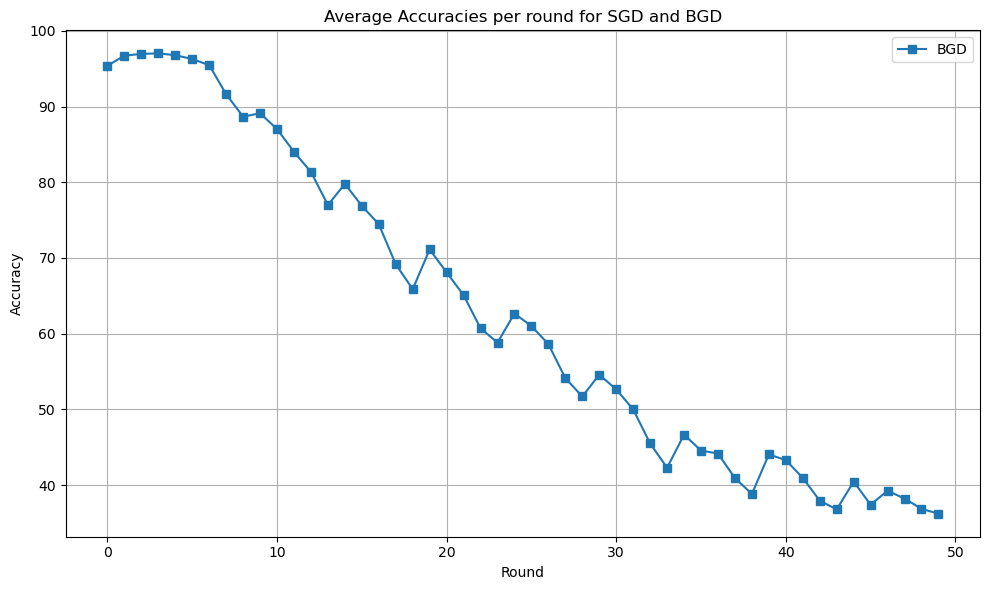

In [12]:
plot_average_accuracies_over_rounds(beta_3_bgd_accs)

#### To compare with prev results


In [19]:
import json

json.dump(exp_results,open("experiment_results.json","w"))

In [20]:
exp_results

{1.0: {'bgd': {'round_wise_task_accuracies': [[96.2],
    [93.3, 97.2],
    [87.5, 94.4, 97.3],
    [71.5, 81.1, 94.6, 97.1],
    [63.6, 72.5, 88.7, 94.6, 97.0],
    [51.5, 66.5, 75.1, 90.8, 94.9, 96.8],
    [41.4, 49.3, 63.0, 82.1, 89.8, 93.5, 96.9],
    [38.5, 33.4, 54.8, 70.2, 80.2, 84.5, 93.4, 96.6],
    [31.5, 32.5, 41.8, 55.0, 63.2, 68.8, 87.3, 94.0, 96.7],
    [31.8, 30.5, 34.6, 50.6, 52.5, 60.0, 77.5, 90.8, 95.6, 96.6]],
   'task_wise_accuracies_over_rounds': [[96.2,
     93.3,
     87.5,
     71.5,
     63.6,
     51.5,
     41.4,
     38.5,
     31.5,
     31.8],
    [97.2, 94.4, 81.1, 72.5, 66.5, 49.3, 33.4, 32.5, 30.5],
    [97.3, 94.6, 88.7, 75.1, 63.0, 54.8, 41.8, 34.6],
    [97.1, 94.6, 90.8, 82.1, 70.2, 55.0, 50.6],
    [97.0, 94.9, 89.8, 80.2, 63.2, 52.5],
    [96.8, 93.5, 84.5, 68.8, 60.0],
    [96.9, 93.4, 87.3, 77.5],
    [96.6, 94.0, 90.8],
    [96.7, 95.6],
    [96.6]]},
  'sgd': {'round_wise_task_accuracies': [[11.4],
    [10.1, 10.1],
    [11.4, 11.4, 11.4],
   

In [156]:
import matplotlib.pyplot as plt
import numpy as np

def pad_accuracies(accuracies):
    max_len = max(len(task) for task in accuracies)
    padded_accuracies = [task + [None] * (max_len - len(task)) for task in accuracies]
    return np.array(padded_accuracies, dtype=np.float32)

def plot_task_accuracies_roundwise(sgd_accuracies, bgd_accuracies, lr):
 
    sgd_accuracies = pad_accuracies(sgd_accuracies)
    bgd_accuracies = pad_accuracies(bgd_accuracies)
    
    plt.figure(figsize=(10, 6))

    for i in range(sgd_accuracies.shape[1]):
        print(f'sgd_accuracies : {sgd_accuracies[:, i]}')
        task_accuracies_over_rounds = sgd_accuracies[:, i]
        print(task_accuracies_over_rounds)
        plt.plot(range(1, sgd_accuracies.shape[0] + 1), task_accuracies_over_rounds, marker='o', linestyle='--', label=f'SGD Task {i+1}')

    for i in range(bgd_accuracies.shape[1]):
        #print(f'bgd_accuracies : {bgd_accuracies[:, i]}')
        plt.plot(range(1, bgd_accuracies.shape[0] + 1), bgd_accuracies[:, i], marker='s', label=f'BGD Task {i+1}')
    
    plt.title(f'Task Accuracies Round-wise for SGD and BGD with lr = {lr}')
    plt.xlabel('Rounds')
    plt.ylabel('Accuracy')
   # plt.legend()
    plt.grid(False)
    plt.tight_layout()
    plt.show()



In [157]:
# def plot_average_task_accuracies_roundwise(sgd_accuracies, bgd_accuracies, lr):
 
#     # sgd_accuracies = pad_accuracies(sgd_accuracies)
#     # bgd_accuracies = pad_accuracies(bgd_accuracies)
    
#     plt.figure(figsize=(10, 6))

#     for i in range(sgd_accuracies.shape[1]):
#         # print(f'sgd_accuracies : {sgd_accuracies[:, i]}')
#         plt.plot(range(1, sgd_accuracies.shape[0] + 1), sgd_accuracies[:, i], marker='o', linestyle='--', label=f'SGD Task {i+1}')
 
#     for i in range(bgd_accuracies.shape[1]):
#         # print(f'bgd_accuracies : {bgd_accuracies[:, i]}')
#         plt.plot(range(1, bgd_accuracies.shape[0] + 1), bgd_accuracies[:, i], marker='s', label=f'BGD Task {i+1}')
    
#     plt.title(f'Average Task Test Accuracies Round-wise for SGD and BGD with lr = {lr}')
#     plt.xlabel('Rounds')
#     plt.ylabel('Accuracy')
#     plt.legend()
#     plt.grid(True)
#     plt.tight_layout()
#     plt.show()


def plot_average_accuracies_over_rounds(sgd_accuracies, bgd_accuracies, learning_rate):
    plt.figure(figsize=(10, 6))
    tasks = range(0, len(sgd_accuracies))
    
    sgd_means = [np.mean(np.array(task_accs)) for task_accs in sgd_accuracies]
    plt.plot(tasks, sgd_means, marker='o', label='SGD')
    
    bgd_means = [np.mean(np.array(task_accs)) for task_accs in bgd_accuracies]
    plt.plot(tasks, bgd_means, marker='s', label='BGD')
    
    plt.xlabel('Round')
    plt.ylabel('Accuracy')
    plt.title(f'Average Accuracies per round for SGD and BGD with lr = {learning_rate}')
    plt.xticks(range(max(len(sgd_accuracies), len(bgd_accuracies))), [f'Round {i+1}' for i in range(max(len(sgd_accuracies), len(bgd_accuracies)))])
    plt.legend()
    plt.grid(False)
    plt.tight_layout()
    plt.show()

sgd_accuracies : [96.3 92.9 81.  57.2 45.7 24.4 14.  11.3 11.   9.9]
[96.3 92.9 81.  57.2 45.7 24.4 14.  11.3 11.   9.9]
sgd_accuracies : [ nan 97.1 95.1 82.4 61.6 39.5 22.9 12.1 12.3 12.5]
[ nan 97.1 95.1 82.4 61.6 39.5 22.9 12.1 12.3 12.5]
sgd_accuracies : [ nan  nan 97.3 91.5 76.9 46.8 27.9 20.4 15.1 13.5]
[ nan  nan 97.3 91.5 76.9 46.8 27.9 20.4 15.1 13.5]
sgd_accuracies : [ nan  nan  nan 97.3 94.2 68.3 47.8 29.1 20.1 15.4]
[ nan  nan  nan 97.3 94.2 68.3 47.8 29.1 20.1 15.4]
sgd_accuracies : [ nan  nan  nan  nan 97.5 93.3 77.8 37.3 18.5 14. ]
[ nan  nan  nan  nan 97.5 93.3 77.8 37.3 18.5 14. ]
sgd_accuracies : [ nan  nan  nan  nan  nan 97.4 93.8 82.2 51.4 34.7]
[ nan  nan  nan  nan  nan 97.4 93.8 82.2 51.4 34.7]
sgd_accuracies : [ nan  nan  nan  nan  nan  nan 97.5 94.4 74.5 56.9]
[ nan  nan  nan  nan  nan  nan 97.5 94.4 74.5 56.9]
sgd_accuracies : [ nan  nan  nan  nan  nan  nan  nan 97.7 94.  86.8]
[ nan  nan  nan  nan  nan  nan  nan 97.7 94.  86.8]
sgd_accuracies : [ nan  nan  nan

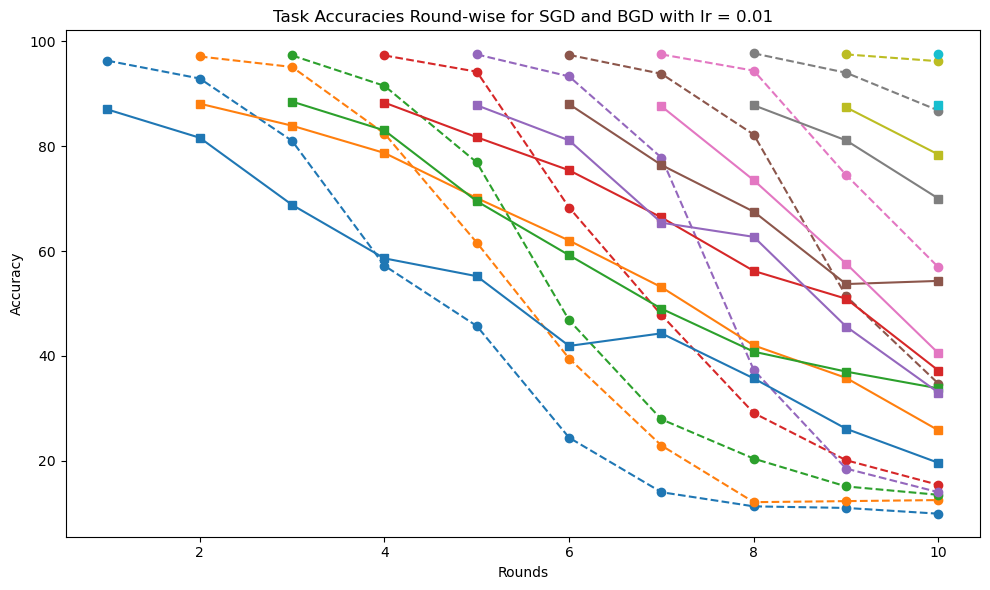

In [158]:
learning_rates = [0.01]
# for lr in exp_results.keys():
for lr in learning_rates:
    plot_task_accuracies_roundwise(exp_results[lr]['sgd']['round_wise_task_accuracies'], exp_results[lr]['bgd']['round_wise_task_accuracies'], lr)

    # plot_average_accuracies_over_rounds(exp_results[lr]['sgd']['round_wise_task_accuracies'], exp_results[lr]['bgd']['round_wise_task_accuracies'], lr)

In [2]:
import sys
import numpy as np
import pandas as pd
import torch
import torchvision
import matplotlib
# import seaborn as sns


print(f"numpy version: {np.__version__}")
print(f"pandas version: {pd.__version__}")
print(f"torch version: {torch.__version__}")
print(f"torchvision version: {torchvision.__version__}")
print(f"python version: {sys.version}")
print(f"matplotlib version: {matplotlib.__version__}")
# print(f"seaborn version: {sns.version}")


numpy version: 1.22.4
pandas version: 1.2.0
torch version: 1.13.1
torchvision version: 0.14.1
python version: 3.9.19 | packaged by conda-forge | (main, Mar 20 2024, 12:50:21) 
[GCC 12.3.0]
matplotlib version: 3.8.4


In [38]:
import json

f = open('experiment_results.json')
data = json.load(f)

In [39]:
data['1.0']['bgd']['round_wise_task_accuracies']

[[96.2],
 [93.3, 97.2],
 [87.5, 94.4, 97.3],
 [71.5, 81.1, 94.6, 97.1],
 [63.6, 72.5, 88.7, 94.6, 97.0],
 [51.5, 66.5, 75.1, 90.8, 94.9, 96.8],
 [41.4, 49.3, 63.0, 82.1, 89.8, 93.5, 96.9],
 [38.5, 33.4, 54.8, 70.2, 80.2, 84.5, 93.4, 96.6],
 [31.5, 32.5, 41.8, 55.0, 63.2, 68.8, 87.3, 94.0, 96.7],
 [31.8, 30.5, 34.6, 50.6, 52.5, 60.0, 77.5, 90.8, 95.6, 96.6]]

In [40]:
import numpy as np

round_wise_task_accs_lst_of_lsts = np.array(data['1.0']['bgd']['round_wise_task_accuracies'])
means = [np.mean(np.array(task_accs)) for task_accs in round_wise_task_accs_lst_of_lsts]
means 

/tmp/ipykernel_878880/1158660389.py:3: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  round_wise_task_accs_lst_of_lsts = np.array(data['1.0']['bgd']['round_wise_task_accuracies'])


[96.2,
 95.25,
 93.06666666666666,
 86.07499999999999,
 83.28,
 79.26666666666667,
 73.71428571428571,
 68.95,
 63.42222222222223,
 62.05]

+ 50 rounds

In [41]:
acc_fifty_rounds = [[95.43], [96.69], [96.75], [97.14], [96.7, 96.18], [95.08, 96.63], [92.57, 96.87], [89.2, 97.0], [82.79, 97.12], [66.68, 96.74, 95.68], [62.87, 95.5, 96.39], [49.85, 94.46, 96.67], [48.79, 92.14, 96.82], [43.45, 86.76, 96.76], [40.5, 80.33, 96.12, 95.31], [41.35, 75.28, 94.49, 96.28], [38.65, 72.24, 92.64, 96.35], [36.76, 66.45, 89.08, 96.46], [31.61, 56.08, 83.15, 96.6], [25.55, 49.62, 71.02, 96.28, 94.76], [24.97, 48.99, 65.89, 94.14, 95.84], [22.69, 43.66, 63.27, 91.9, 96.2], [25.98, 41.51, 57.68, 86.22, 96.18], [22.55, 40.85, 53.01, 81.55, 96.34], [21.13, 38.36, 47.94, 75.56, 96.11, 94.73], [21.53, 39.09, 44.05, 72.67, 94.71, 95.57], [24.73, 38.92, 40.33, 71.1, 84.35, 94.34], [22.02, 34.54, 34.97, 62.37, 83.78, 95.8], [21.37, 30.9, 31.98, 54.71, 78.22, 95.96], [20.13, 30.26, 29.51, 44.7, 68.38, 95.53, 94.4], [18.14, 27.1, 28.99, 40.61, 62.63, 94.24, 94.99], [16.47, 26.18, 28.97, 33.87, 59.68, 91.4, 94.95], [16.49, 21.65, 22.62, 26.94, 51.48, 86.47, 95.88], [16.57, 16.72, 21.39, 23.12, 45.75, 82.38, 95.78], [15.35, 15.38, 18.5, 21.95, 43.24, 77.36, 95.47, 93.93], [13.39, 18.33, 17.88, 20.44, 33.35, 65.22, 89.04, 91.89], [11.68, 18.17, 17.34, 17.38, 27.61, 57.59, 81.92, 87.77], [15.64, 16.01, 19.84, 20.72, 25.55, 49.34, 72.59, 95.74], [15.56, 14.8, 16.31, 17.44, 22.63, 47.34, 60.13, 95.86], [15.41, 15.28, 16.21, 17.06, 21.69, 43.74, 49.92, 95.47, 93.27], [13.5, 16.27, 15.31, 14.89, 19.27, 37.7, 41.95, 93.56, 91.85], [13.09, 17.72, 15.33, 14.56, 20.93, 37.16, 39.65, 88.78, 93.57], [14.61, 17.38, 12.29, 15.37, 17.82, 36.7, 36.89, 84.47, 95.57], [15.32, 16.23, 10.99, 16.02, 17.75, 33.78, 34.96, 75.45, 95.58], [14.4, 18.24, 9.86, 16.54, 19.19, 29.24, 31.87, 70.56, 94.88, 90.41], [14.17, 18.63, 8.29, 17.09, 19.05, 31.0, 32.04, 56.6, 89.53, 92.79], [13.23, 17.46, 8.47, 14.35, 19.12, 27.49, 29.25, 56.52, 87.08, 86.47], [12.62, 18.07, 8.4, 14.87, 18.23, 24.92, 32.01, 53.21, 85.37, 95.01], [12.15, 18.56, 9.06, 15.69, 17.25, 25.09, 33.8, 50.04, 84.15, 95.46], [12.43, 18.06, 8.86, 14.85, 18.77, 23.95, 33.32, 51.16, 82.94, 95.62]]

In [43]:
acc_fifty_rounds = np.array(acc_fifty_rounds)
acc_fifty_rounds_means = [np.mean(np.array(task_accs)) for task_accs in acc_fifty_rounds]
acc_fifty_rounds_means 

[95.43,
 96.69,
 96.75,
 97.14,
 96.44,
 95.85499999999999,
 94.72,
 93.1,
 89.95500000000001,
 86.36666666666667,
 84.92,
 80.32666666666667,
 79.25,
 75.65666666666668,
 78.065,
 76.85,
 74.97,
 72.1875,
 66.86,
 67.446,
 65.96600000000001,
 63.544000000000004,
 61.513999999999996,
 58.85999999999999,
 62.30500000000001,
 61.27,
 58.961666666666666,
 55.580000000000005,
 52.19,
 54.701428571428565,
 52.385714285714286,
 50.21714285714286,
 45.93285714285714,
 43.10142857142858,
 47.6475,
 43.692499999999995,
 39.9325,
 39.428749999999994,
 36.25875,
 40.89444444444444,
 38.25555555555555,
 37.86555555555556,
 36.788888888888884,
 35.12,
 39.51899999999999,
 37.919,
 35.943999999999996,
 36.271,
 36.125,
 35.995999999999995]

numpy version: 1.26.4
pandas version: 2.2.2
torch version: 1.13.1
torchvision version: 0.14.1
python version: 3.9.19 | packaged by conda-forge | (main, Mar 20 2024, 12:50:21) 
[GCC 12.3.0]
matplotlib version: 3.5.0

In [5]:
import wandb


!wandb login --relogin


wandb: Logging into wandb.ai. (Learn how to deploy a W&B server locally: https://wandb.me/wandb-server)
wandb: You can find your API key in your browser here: https://wandb.ai/authorize
wandb: Paste an API key from your profile and hit enter, or press ctrl+c to quit: 
Aborted!


In [ ]:
!604720c98cb137cc3ac68d2e37f83694a3cef68a


In [7]:
import wandb

wandb.init(project="bgd_fl_changed_agg_strategy",
           config = {
               "agg_strategy" : 'modified fed avg'
            
           })
